In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

In [2]:
df = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\week-0\EDA\data-set\togo-dapaong_qc.csv')

In [3]:
display(df.shape)

(525600, 19)

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

None

In [5]:
display(df.head())

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [6]:
display(df.describe(include=[np.number]))

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
missing_report = df.isna().sum().sort_values(ascending=False)
missing_percentage = (df.isna().mean() * 100).sort_values(ascending=False)
missing_df = pd.concat([missing_report, missing_percentage], axis=1)
missing_df.columns = ['Missing Count', 'Missing Percentage']
display(missing_report)
display(missing_df[missing_df['Missing Percentage'] > 5])

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

,Missing Count,Missing Percentage
Comments,525600,100.0


In [8]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

def detect_outliers(df, columns, threshold=3):
    df = df.copy()
    df['Outlier_Flag'] = False  

    for col in columns:
        if col in df.columns:
            z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
            df['Outlier_Flag'] |= (z_scores > threshold)
    
    total_outliers = df['Outlier_Flag'].sum()
    percent = total_outliers / len(df) * 100
    print(f"Detected {total_outliers} outlier rows ({percent:.2f}% of total).")
    
    return df
df = detect_outliers(df, key_columns)


Detected 9251 outlier rows (1.76% of total).


In [9]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
Outlier_Flag          0
dtype: int64

In [10]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [11]:
df.to_csv('../data/togo-dapaong_qc_clean.csv', index=False)

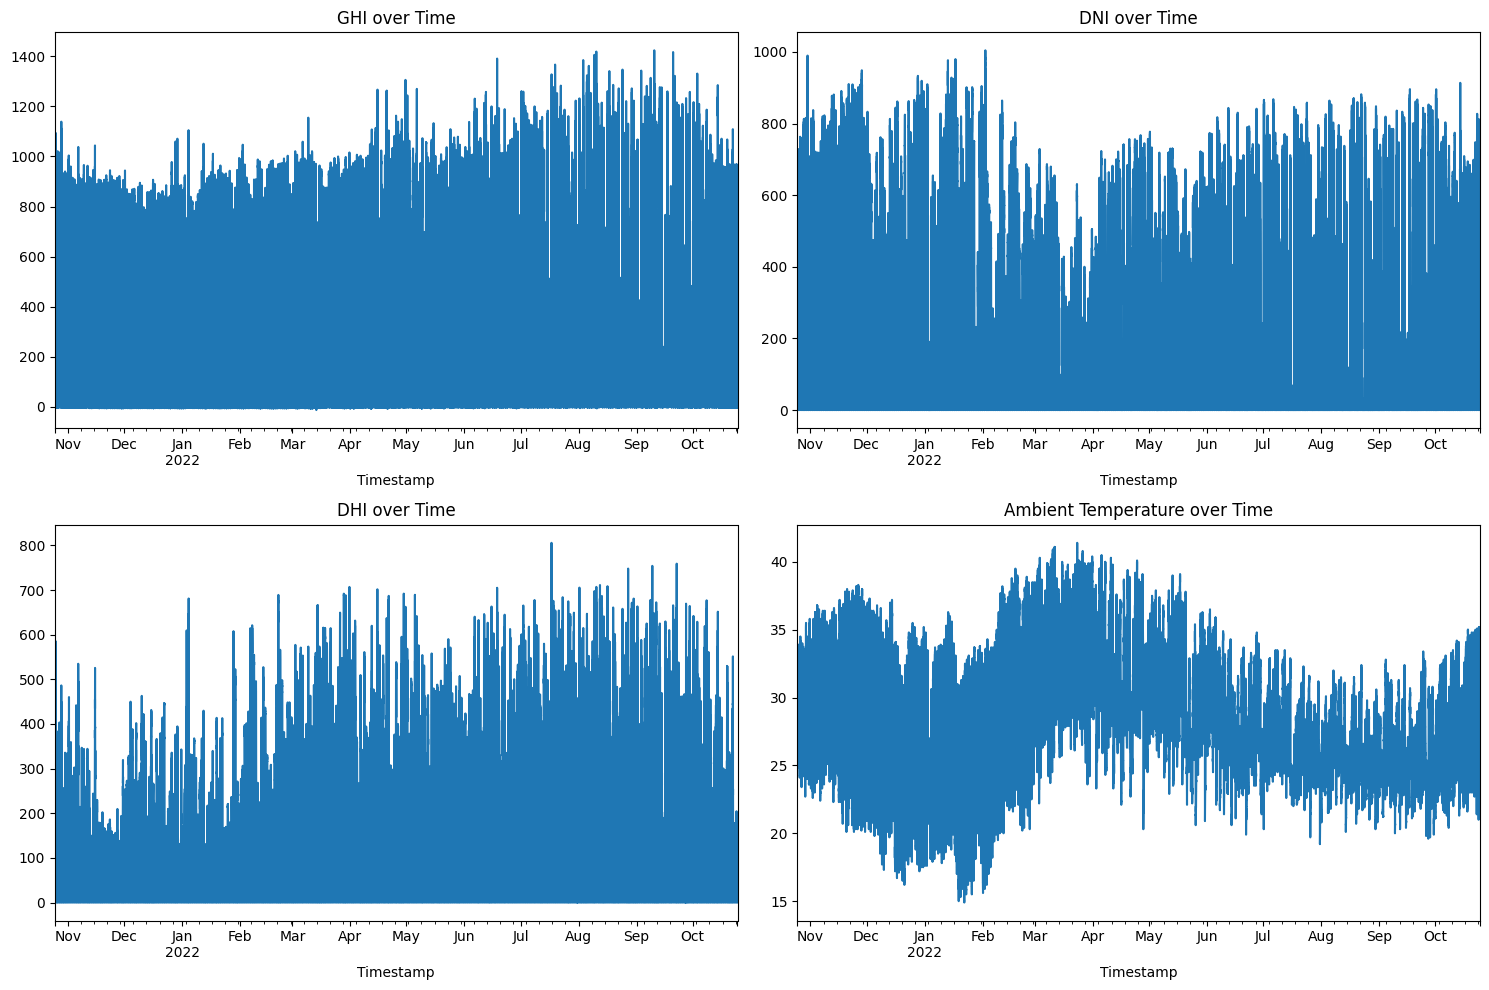

C:\Users\bless\AppData\Local\Temp\ipykernel_13976\4137201449.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = ts_df.resample('M').mean()


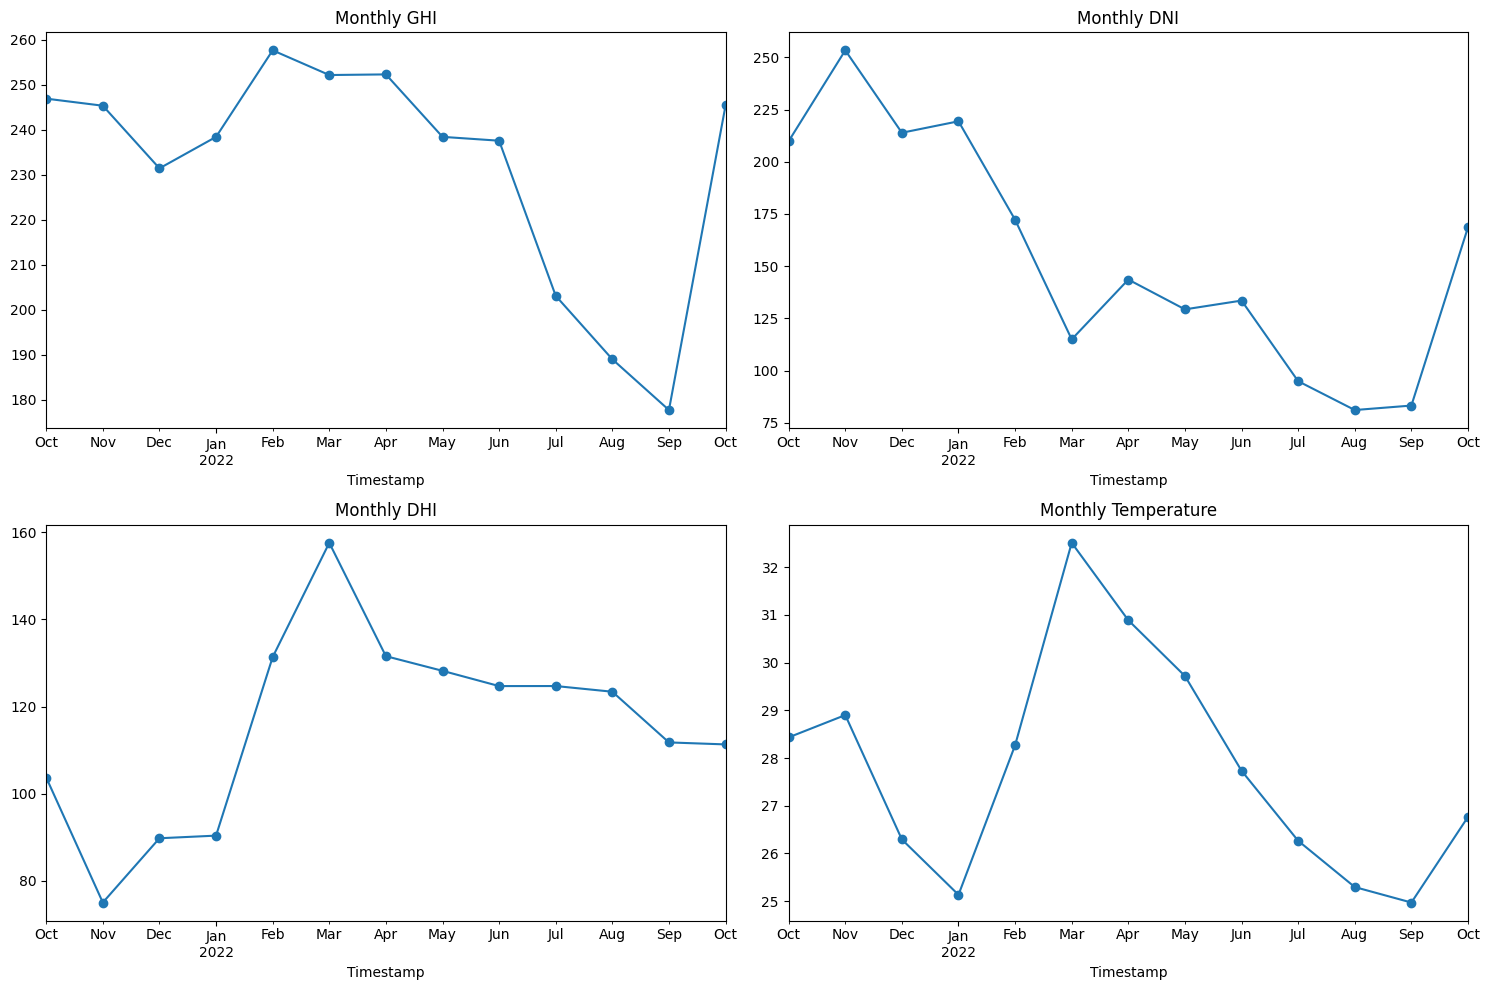

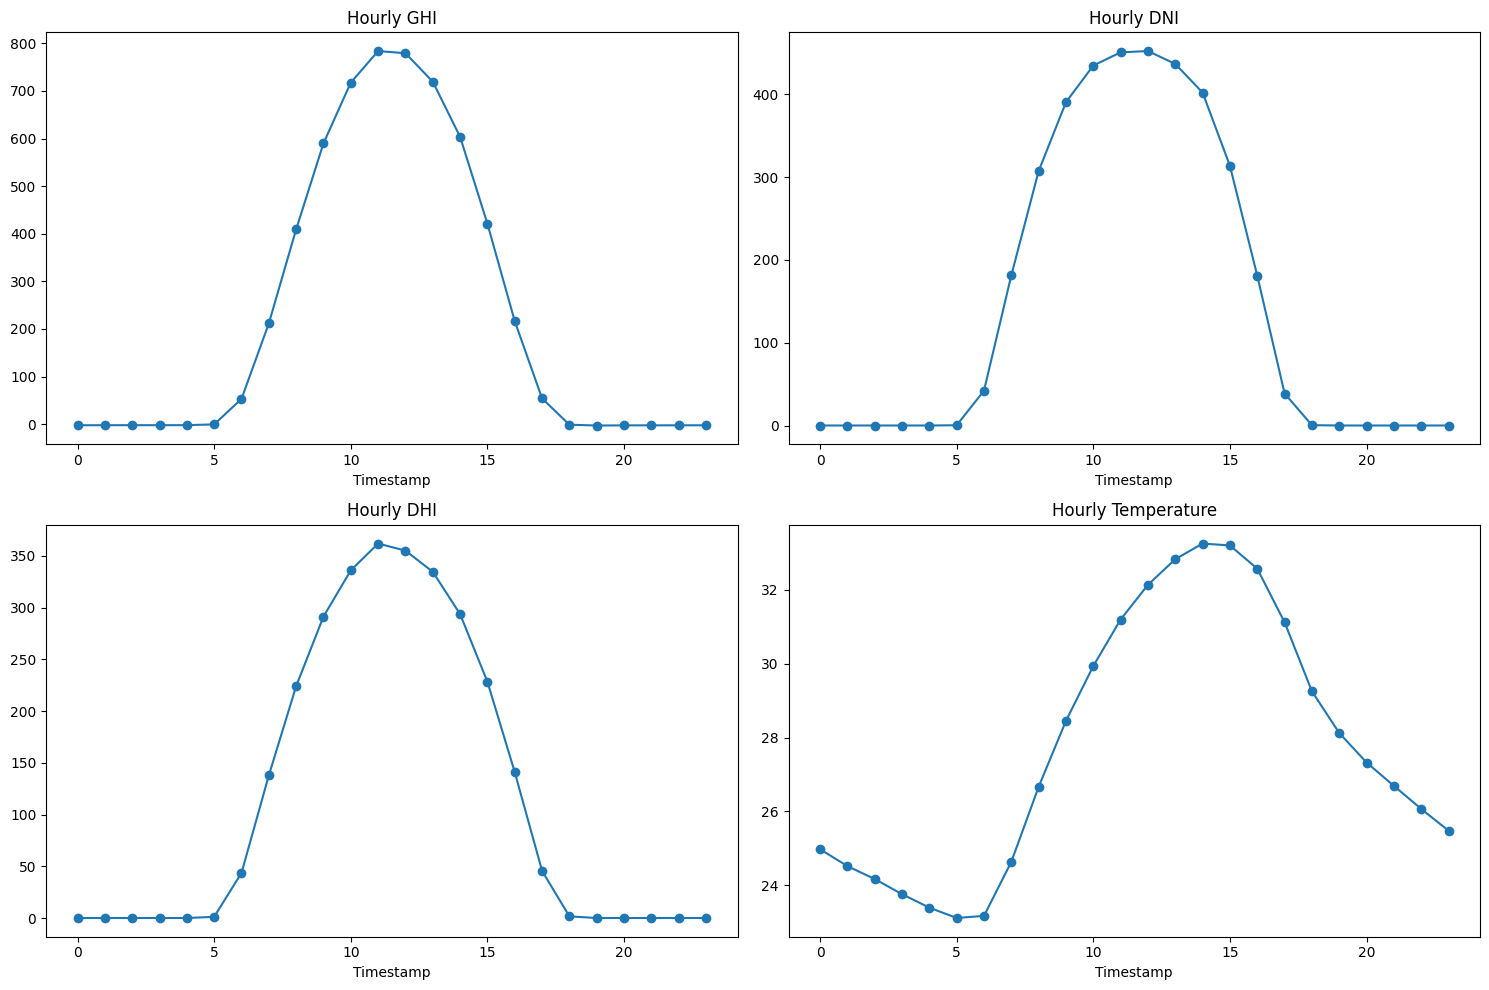

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
ts_df = df.set_index('Timestamp')


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ts_df['GHI'].plot(ax=axes[0,0], title='GHI over Time')
ts_df['DNI'].plot(ax=axes[0,1], title='DNI over Time')
ts_df['DHI'].plot(ax=axes[1,0], title='DHI over Time')
ts_df['Tamb'].plot(ax=axes[1,1], title='Ambient Temperature over Time')
plt.tight_layout()
plt.show()


monthly_avg = ts_df.resample('M').mean()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
monthly_avg['GHI'].plot(ax=axes[0,0], title='Monthly GHI', marker='o')
monthly_avg['DNI'].plot(ax=axes[0,1], title='Monthly DNI', marker='o')
monthly_avg['DHI'].plot(ax=axes[1,0], title='Monthly DHI', marker='o')
monthly_avg['Tamb'].plot(ax=axes[1,1], title='Monthly Temperature', marker='o')
plt.tight_layout()
plt.show()


hourly_avg = ts_df.groupby(ts_df.index.hour).mean()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
hourly_avg['GHI'].plot(ax=axes[0,0], title='Hourly GHI', marker='o')
hourly_avg['DNI'].plot(ax=axes[0,1], title='Hourly DNI', marker='o')
hourly_avg['DHI'].plot(ax=axes[1,0], title='Hourly DHI', marker='o')
hourly_avg['Tamb'].plot(ax=axes[1,1], title='Hourly Temperature', marker='o')
plt.tight_layout()
plt.show()

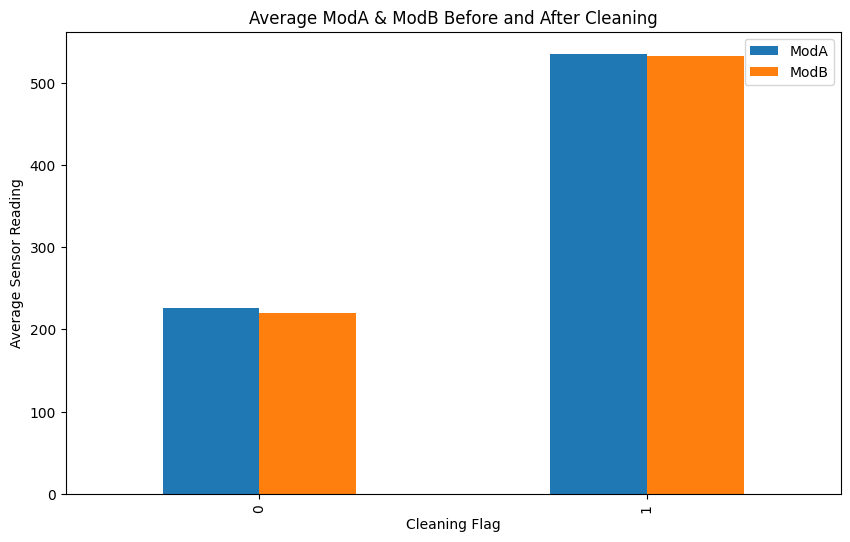

In [13]:
cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

cleaning_group.plot(kind='bar', figsize=(10, 6))
plt.title('Average ModA & ModB Before and After Cleaning')
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Sensor Reading')
plt.show()


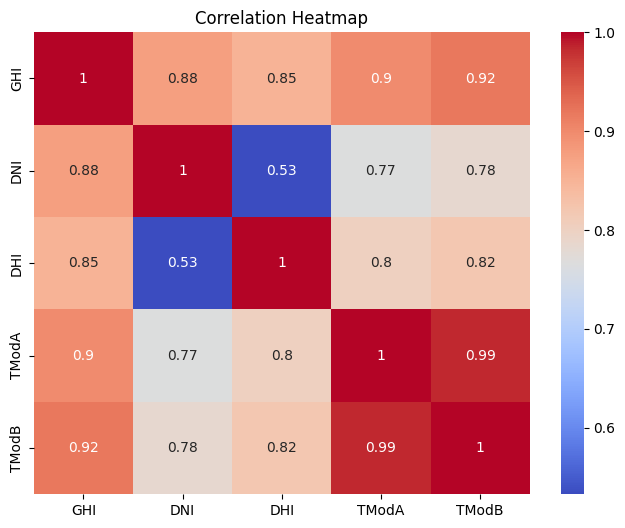

In [14]:
corr_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


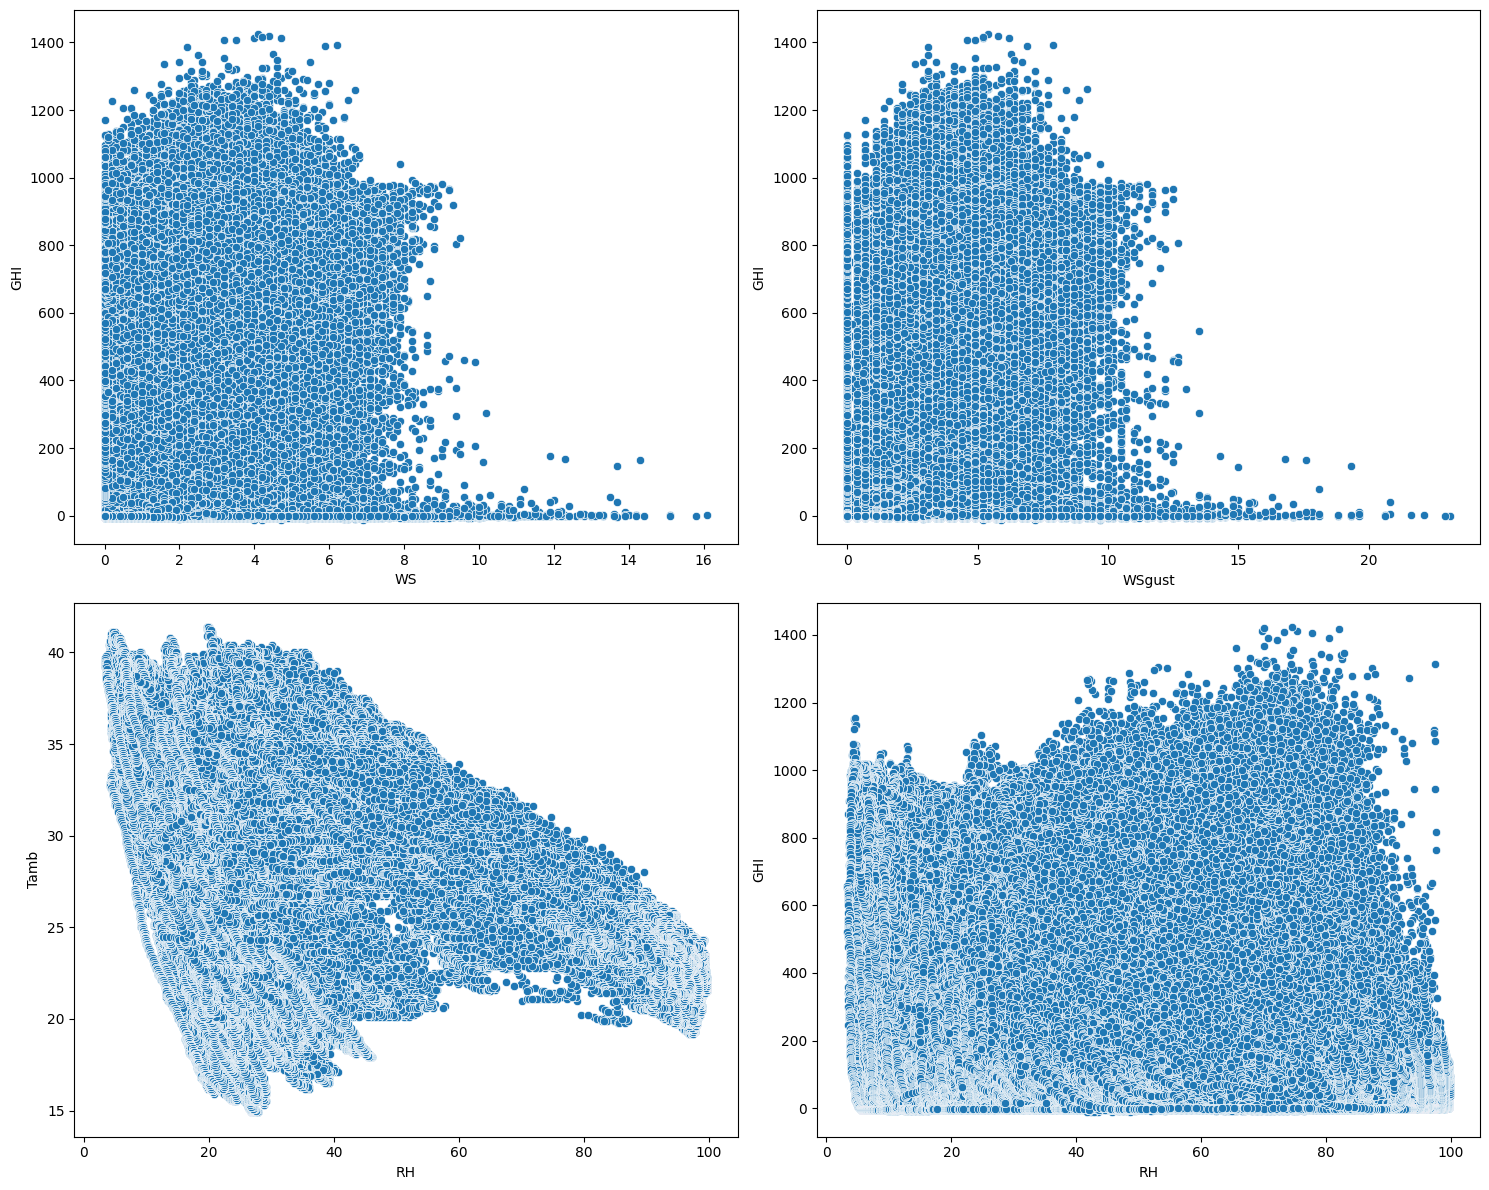

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(data=df, x='WS', y='GHI', ax=axes[0, 0])
sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axes[0, 1])
sns.scatterplot(data=df, x='RH', y='Tamb', ax=axes[1, 0])
sns.scatterplot(data=df, x='RH', y='GHI', ax=axes[1, 1])
plt.tight_layout()
plt.show()

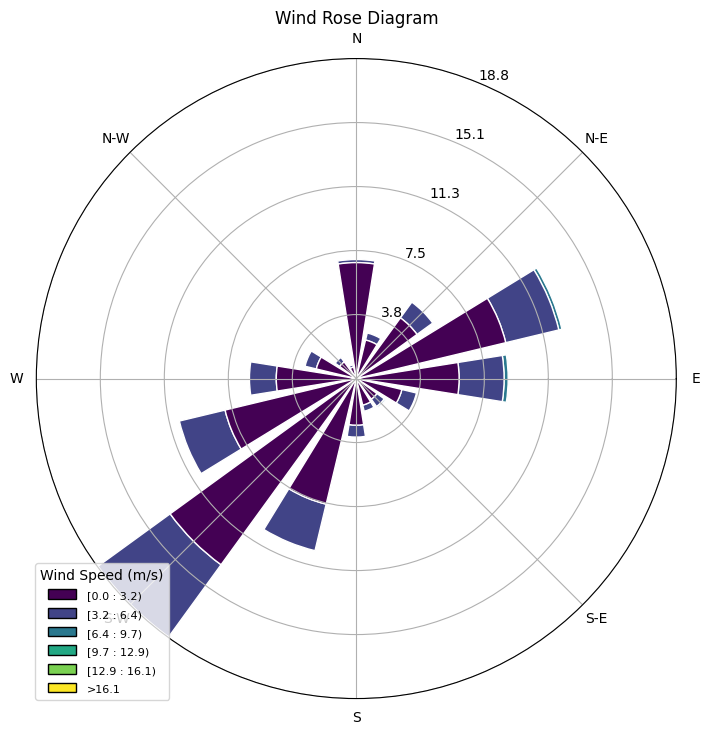

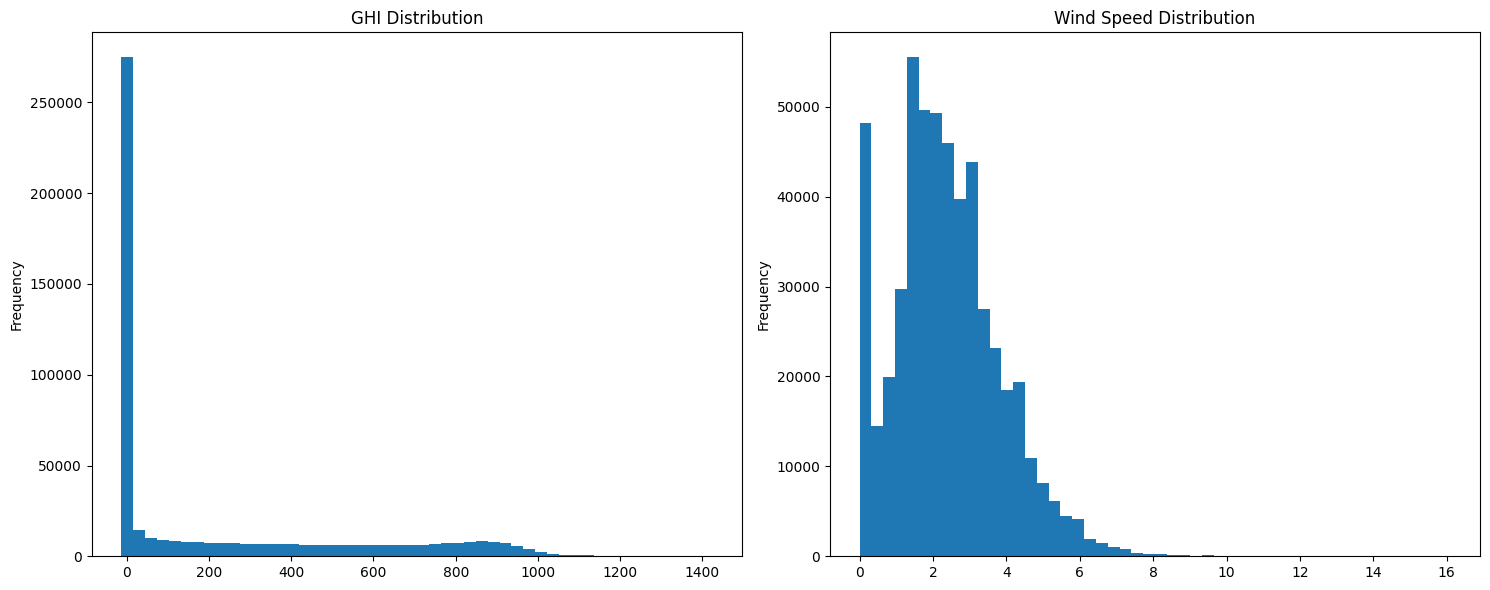

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose Diagram')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
df['GHI'].plot(kind='hist', bins=50, ax=axes[0], title='GHI Distribution')
df['WS'].plot(kind='hist', bins=50, ax=axes[1], title='Wind Speed Distribution')
plt.tight_layout()
plt.show()

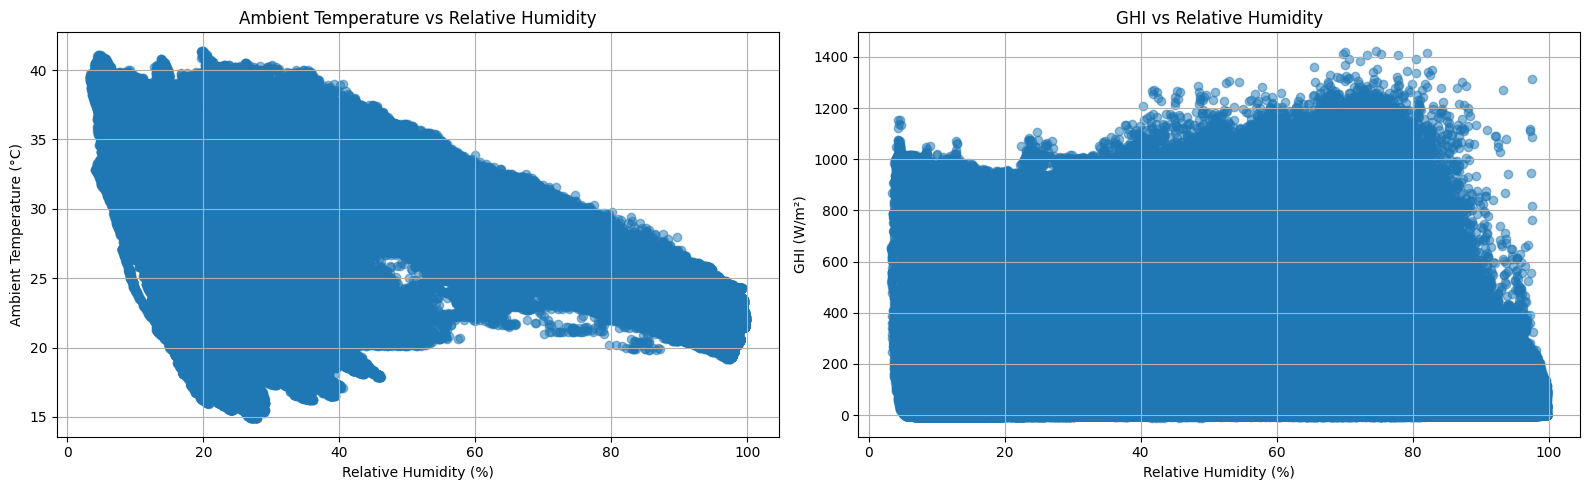

In [17]:
plt.figure(figsize=(16, 5))  
plt.subplot(1, 2, 1)  
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('Ambient Temperature vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)


plt.subplot(1, 2, 2) 
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('GHI vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)


plt.tight_layout()
plt.show()

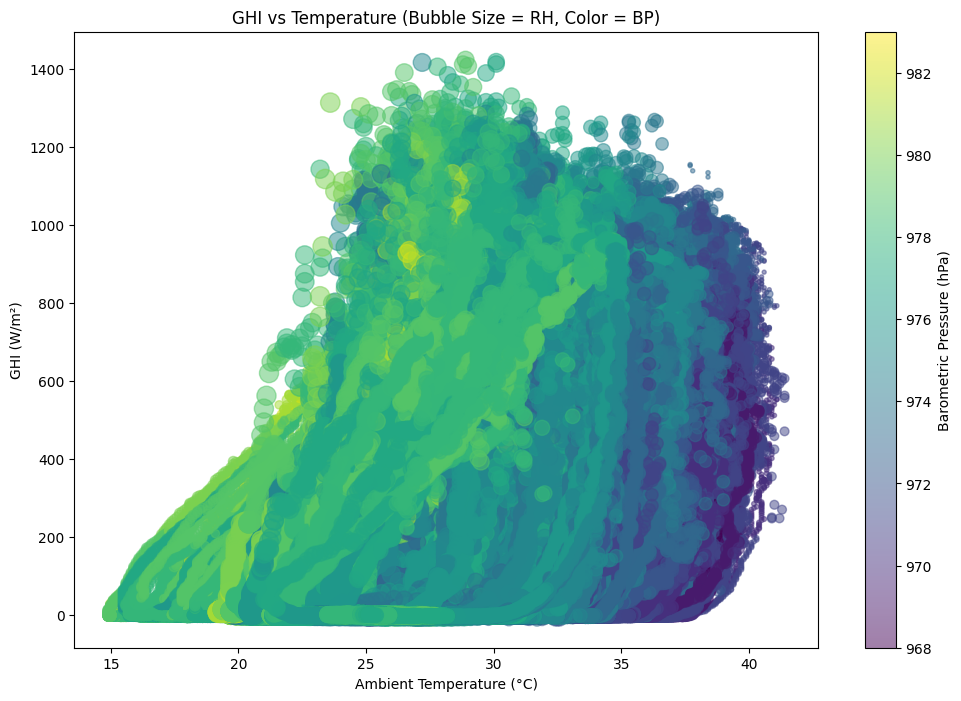

In [18]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5, 
                     c=df['BP'], cmap='viridis')
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble Size = RH, Color = BP)')
plt.show()